In [54]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import folium
import seaborn as sns
import missingno as msno

In [2]:
plt.rc("font", family="Malgun Gothic")
plt.style.use("ggplot")

In [3]:
patient_info = pd.read_csv("PatientInfo.csv", encoding="utf-8")

In [4]:
patient_info

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,7000000010,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,18,NaN,2020-04-03,2020-04-21,NaN,released
4000,7000000011,NaN,male,NaN,30s,Korea,Jeju-do,Jeju-do,NaN,contact with patient,NaN,7000000009,5,NaN,2020-04-03,NaN,NaN,isolated
4001,7000000012,NaN,female,NaN,20s,Korea,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,9,NaN,2020-04-03,2020-05-05,NaN,released
4002,7000000013,NaN,female,NaN,10s,China,Jeju-do,Jeju-do,NaN,overseas inflow,NaN,NaN,6,NaN,2020-04-14,2020-04-26,NaN,released


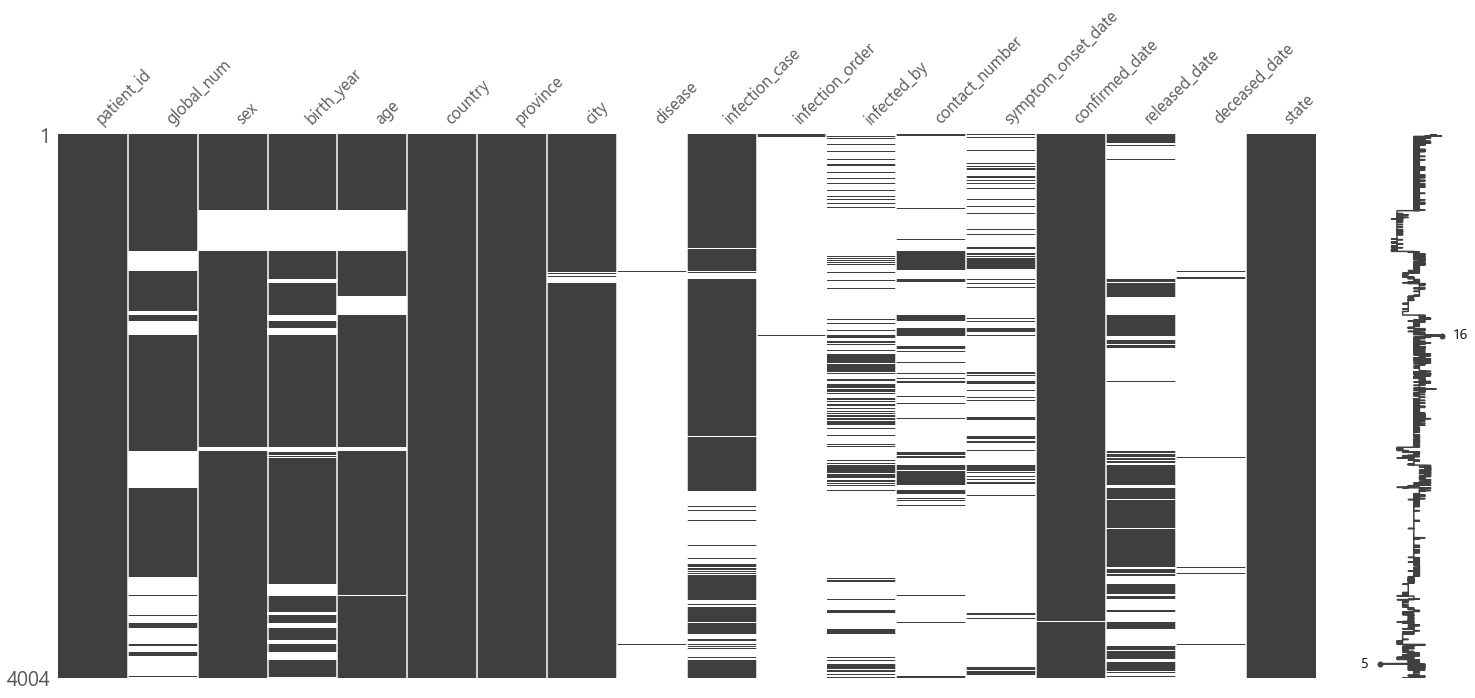

In [5]:
msno.matrix(patient_info)

In [6]:
column_name = ["patient_id", "sex", "age", "infection_case", "confirmed_date", "released_date", "state"]

In [7]:
patient_info = patient_info[column_name]
#필요없는 column제거

In [8]:
patient_info

,patient_id,sex,age,infection_case,confirmed_date,released_date,state
0,1000000001,male,50s,overseas inflow,2020-01-23,2020-02-05,released
1,1000000002,male,30s,overseas inflow,2020-01-30,2020-03-02,released
2,1000000003,male,50s,contact with patient,2020-01-30,2020-02-19,released
3,1000000004,male,20s,overseas inflow,2020-01-30,2020-02-15,released
4,1000000005,female,20s,contact with patient,2020-01-31,2020-02-24,released
...,...,...,...,...,...,...,...
3999,7000000010,female,20s,overseas inflow,2020-04-03,2020-04-21,released
4000,7000000011,male,30s,contact with patient,2020-04-03,NaN,isolated
4001,7000000012,female,20s,overseas inflow,2020-04-03,2020-05-05,released
4002,7000000013,female,10s,overseas inflow,2020-04-14,2020-04-26,released


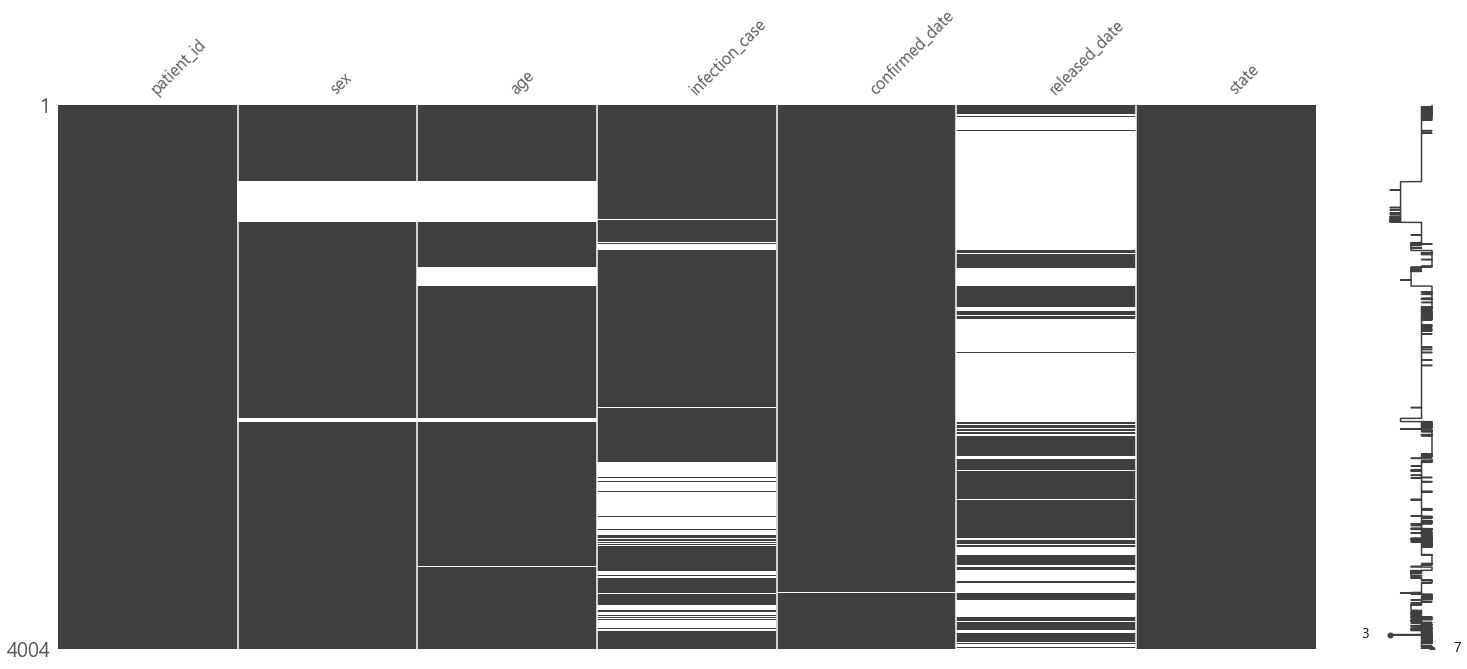

In [9]:
msno.matrix(patient_info)

In [10]:
patient_info = patient_info[patient_info["sex"].notnull()]
patient_info = patient_info[patient_info["age"].notnull()]
patient_info = patient_info[patient_info["infection_case"].notnull()]
patient_info = patient_info[patient_info["confirmed_date"].notnull()]
patient_info = patient_info[patient_info["released_date"].notnull()]
patient_info
#공백 있는곳 제거

,patient_id,sex,age,infection_case,confirmed_date,released_date,state
0,1000000001,male,50s,overseas inflow,2020-01-23,2020-02-05,released
1,1000000002,male,30s,overseas inflow,2020-01-30,2020-03-02,released
2,1000000003,male,50s,contact with patient,2020-01-30,2020-02-19,released
3,1000000004,male,20s,overseas inflow,2020-01-30,2020-02-15,released
4,1000000005,female,20s,contact with patient,2020-01-31,2020-02-24,released
...,...,...,...,...,...,...,...
3997,7000000008,female,10s,overseas inflow,2020-03-27,2020-04-12,released
3998,7000000009,female,20s,overseas inflow,2020-03-29,2020-04-28,released
3999,7000000010,female,20s,overseas inflow,2020-04-03,2020-04-21,released
4001,7000000012,female,20s,overseas inflow,2020-04-03,2020-05-05,released


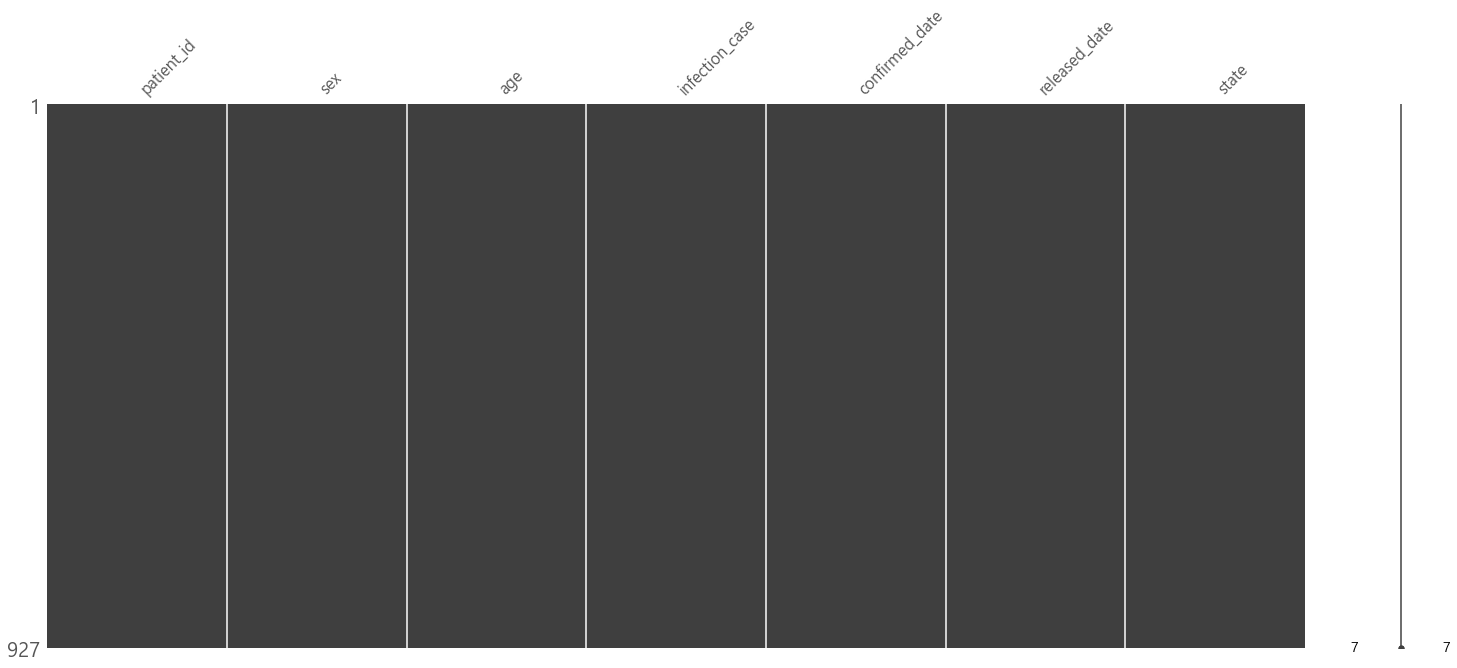

In [11]:
msno.matrix(patient_info)
#공백 확인

In [12]:
patient_middle_age = patient_info[patient_info["age"].str.contains("30s|40s|50s")]
#중년층 데이터

In [13]:
patient_young_age = patient_info[patient_info["age"].str.contains("10s|20s")]
#청소년층 데이터

In [14]:
patient_middle_age["state"].value_counts()

released    473
isolated      5
Name: state, dtype: int64

In [15]:
patient_young_age["state"].value_counts()

released    224
isolated      4
Name: state, dtype: int64

In [16]:
from datetime import datetime, timedelta

In [17]:
patient_middle_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 0 to 3995
Data columns (total 7 columns):
patient_id        478 non-null int64
sex               478 non-null object
age               478 non-null object
infection_case    478 non-null object
confirmed_date    478 non-null object
released_date     478 non-null object
state             478 non-null object
dtypes: int64(1), object(6)
memory usage: 29.9+ KB


In [18]:
#문자열을 날짜로 변환
patient_middle_age["confirmed_date"] = patient_middle_age["confirmed_date"].apply(lambda x:
                                                                                 datetime.strptime(x, "%Y-%m-%d"))

C:\ai\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
patient_middle_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 0 to 3995
Data columns (total 7 columns):
patient_id        478 non-null int64
sex               478 non-null object
age               478 non-null object
infection_case    478 non-null object
confirmed_date    478 non-null datetime64[ns]
released_date     478 non-null object
state             478 non-null object
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 29.9+ KB


In [20]:
patient_middle_age["released_date"] = patient_middle_age["released_date"].apply(lambda x:
                                                                                 datetime.strptime(x, "%Y-%m-%d"))

C:\ai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
patient_middle_age["days"] = patient_middle_age["released_date"] - patient_middle_age["confirmed_date"]

C:\ai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
patient_middle_age

,patient_id,sex,age,infection_case,confirmed_date,released_date,state,days
0,1000000001,male,50s,overseas inflow,2020-01-23,2020-02-05,released,13 days
1,1000000002,male,30s,overseas inflow,2020-01-30,2020-03-02,released,32 days
2,1000000003,male,50s,contact with patient,2020-01-30,2020-02-19,released,20 days
5,1000000006,female,50s,contact with patient,2020-01-31,2020-02-19,released,19 days
8,1000000009,male,30s,overseas inflow,2020-02-05,2020-02-21,released,16 days
...,...,...,...,...,...,...,...,...
3952,6100000085,male,30s,overseas inflow,2020-03-16,2020-04-08,released,23 days
3959,6100000092,male,40s,overseas inflow,2020-03-28,2020-04-15,released,18 days
3992,7000000003,female,40s,etc,2020-03-02,2020-03-15,released,13 days
3993,7000000004,male,40s,etc,2020-03-04,2020-03-21,released,17 days


In [23]:
patient_middle_age["days"] = patient_middle_age["days"].dt.days
#days제거

C:\ai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
patient_middle_age

,patient_id,sex,age,infection_case,confirmed_date,released_date,state,days
0,1000000001,male,50s,overseas inflow,2020-01-23,2020-02-05,released,13
1,1000000002,male,30s,overseas inflow,2020-01-30,2020-03-02,released,32
2,1000000003,male,50s,contact with patient,2020-01-30,2020-02-19,released,20
5,1000000006,female,50s,contact with patient,2020-01-31,2020-02-19,released,19
8,1000000009,male,30s,overseas inflow,2020-02-05,2020-02-21,released,16
...,...,...,...,...,...,...,...,...
3952,6100000085,male,30s,overseas inflow,2020-03-16,2020-04-08,released,23
3959,6100000092,male,40s,overseas inflow,2020-03-28,2020-04-15,released,18
3992,7000000003,female,40s,etc,2020-03-02,2020-03-15,released,13
3993,7000000004,male,40s,etc,2020-03-04,2020-03-21,released,17


In [25]:
patient_young_age["confirmed_date"] = patient_young_age["confirmed_date"].apply(lambda x:
                                                                                 datetime.strptime(x, "%Y-%m-%d"))

C:\ai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
patient_young_age["released_date"] = patient_young_age["released_date"].apply(lambda x:
                                                                                 datetime.strptime(x, "%Y-%m-%d"))

C:\ai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
patient_young_age["days"] = patient_young_age["released_date"] - patient_young_age["confirmed_date"]

C:\ai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
patient_young_age

,patient_id,sex,age,infection_case,confirmed_date,released_date,state,days
3,1000000004,male,20s,overseas inflow,2020-01-30,2020-02-15,released,16 days
4,1000000005,female,20s,contact with patient,2020-01-31,2020-02-24,released,24 days
6,1000000007,male,20s,contact with patient,2020-01-31,2020-02-10,released,10 days
7,1000000008,male,20s,overseas inflow,2020-02-02,2020-02-24,released,22 days
11,1000000012,male,20s,overseas inflow,2020-02-07,2020-02-27,released,20 days
...,...,...,...,...,...,...,...,...
3997,7000000008,female,10s,overseas inflow,2020-03-27,2020-04-12,released,16 days
3998,7000000009,female,20s,overseas inflow,2020-03-29,2020-04-28,released,30 days
3999,7000000010,female,20s,overseas inflow,2020-04-03,2020-04-21,released,18 days
4001,7000000012,female,20s,overseas inflow,2020-04-03,2020-05-05,released,32 days


In [29]:
patient_young_age["days"] = patient_young_age["days"].dt.days

C:\ai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
patient_young_age

,patient_id,sex,age,infection_case,confirmed_date,released_date,state,days
3,1000000004,male,20s,overseas inflow,2020-01-30,2020-02-15,released,16
4,1000000005,female,20s,contact with patient,2020-01-31,2020-02-24,released,24
6,1000000007,male,20s,contact with patient,2020-01-31,2020-02-10,released,10
7,1000000008,male,20s,overseas inflow,2020-02-02,2020-02-24,released,22
11,1000000012,male,20s,overseas inflow,2020-02-07,2020-02-27,released,20
...,...,...,...,...,...,...,...,...
3997,7000000008,female,10s,overseas inflow,2020-03-27,2020-04-12,released,16
3998,7000000009,female,20s,overseas inflow,2020-03-29,2020-04-28,released,30
3999,7000000010,female,20s,overseas inflow,2020-04-03,2020-04-21,released,18
4001,7000000012,female,20s,overseas inflow,2020-04-03,2020-05-05,released,32


In [31]:
patient_young_age[["age", "days"]].groupby("age").mean()
#나이별 회복에 걸린시간

,days
age,
10s,21.057143
20s,22.259067


In [32]:
patient_young_age[["sex", "days"]].groupby("sex").mean()
#성별에 따른 회복에 걸린시간

,days
sex,
female,22.907563
male,21.165138


In [33]:
patient_middle_age[["age", "days"]].groupby("age").mean()

,days
age,
30s,21.689189
40s,24.386905
50s,24.117284


In [34]:
patient_middle_age[["sex", "days"]].groupby("sex").mean()

,days
sex,
female,23.257143
male,23.673820


In [35]:
patient_info = pd.read_csv("PatientInfo.csv", encoding="utf-8")

In [36]:
column_name = ["patient_id", "sex", "age", "infection_case", "state"]

In [37]:
patient_info = patient_info[column_name]

In [38]:
patient_info

,patient_id,sex,age,infection_case,state
0,1000000001,male,50s,overseas inflow,released
1,1000000002,male,30s,overseas inflow,released
2,1000000003,male,50s,contact with patient,released
3,1000000004,male,20s,overseas inflow,released
4,1000000005,female,20s,contact with patient,released
...,...,...,...,...,...
3999,7000000010,female,20s,overseas inflow,released
4000,7000000011,male,30s,contact with patient,isolated
4001,7000000012,female,20s,overseas inflow,released
4002,7000000013,female,10s,overseas inflow,released


In [39]:
patient_info["state"].value_counts()

released    2340
isolated    1590
deceased      74
Name: state, dtype: int64

In [40]:
patient_info = patient_info[patient_info["sex"].notnull()]
patient_info = patient_info[patient_info["age"].notnull()]
patient_info = patient_info[patient_info["infection_case"].notnull()]

In [41]:
patient_info

,patient_id,sex,age,infection_case,state
0,1000000001,male,50s,overseas inflow,released
1,1000000002,male,30s,overseas inflow,released
2,1000000003,male,50s,contact with patient,released
3,1000000004,male,20s,overseas inflow,released
4,1000000005,female,20s,contact with patient,released
...,...,...,...,...,...
3999,7000000010,female,20s,overseas inflow,released
4000,7000000011,male,30s,contact with patient,isolated
4001,7000000012,female,20s,overseas inflow,released
4002,7000000013,female,10s,overseas inflow,released


In [42]:
patient_1020 = patient_info[patient_info["age"].str.contains("10s|20s")]
#10~20대 환자만 조회

In [43]:
patient_304050 = patient_info[patient_info["age"].str.contains("30s|40s|50s")]
#30~50대 환자 조회

In [44]:
patient_1020["state"].value_counts()

released    495
isolated    287
Name: state, dtype: int64

In [45]:
patient_304050["state"].value_counts()

released    818
isolated    482
deceased      7
Name: state, dtype: int64

In [46]:
patient_304050

,patient_id,sex,age,infection_case,state
0,1000000001,male,50s,overseas inflow,released
1,1000000002,male,30s,overseas inflow,released
2,1000000003,male,50s,contact with patient,released
5,1000000006,female,50s,contact with patient,released
8,1000000009,male,30s,overseas inflow,released
...,...,...,...,...,...
3992,7000000003,female,40s,etc,released
3993,7000000004,male,40s,etc,released
3995,7000000006,male,30s,overseas inflow,released
4000,7000000011,male,30s,contact with patient,isolated


In [47]:
patient_304050 = patient_304050.sort_index(by=["age", "state"])

C:\ai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


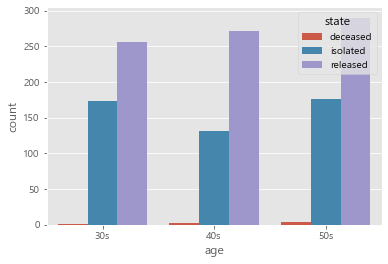

In [48]:
sns.countplot(data=patient_304050, x="age", hue="state")
#중년층 감염자 상태 조회

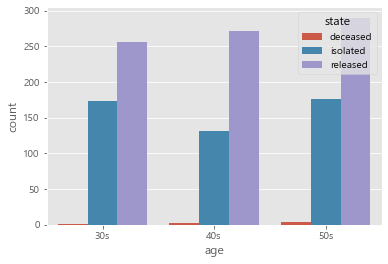

In [49]:
plt.style.use("ggplot")
sns_plot = sns.countplot(data=patient_304050, x="age", hue="state")
fig = sns_plot.get_figure()
fig.savefig("middleage state.png")

In [50]:
patient_1020 = patient_1020.sort_index(by=["age", "state"])

C:\ai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


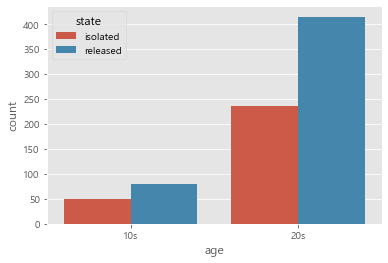

In [51]:
sns_plot = sns.countplot(data=patient_1020, x="age", hue="state")
fig = sns_plot.get_figure()
fig.savefig("youngage state.png")
#청소년층 감염자 상태

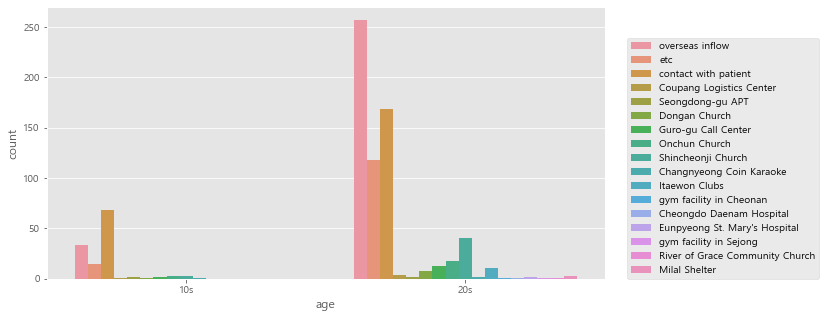

In [60]:
plt.figure(figsize=(10,5))
sns_plot = sns.countplot(data=patient_1020, x="age", hue="infection_case")
fig = sns_plot.get_figure()
fig.savefig("youngage infection case.png")
plt.legend(loc=(1.04,0))
#10~20대 감염방법

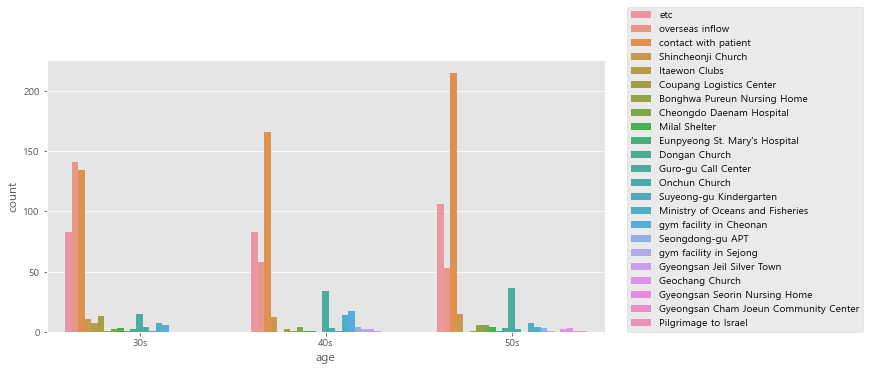

In [61]:
plt.figure(figsize=(10,5))

sns_plot = sns.countplot(data=patient_304050, x="age", hue="infection_case")
fig = sns_plot.get_figure()
fig.savefig("middleage infection case.png")
plt.legend(loc=(1.04,0))
#30~50대 감염방법

In [244]:
patient_timeage = pd.read_csv("TimeAge.csv", encoding="utf-8")

In [245]:
patient_timeage = patient_timeage[patient_timeage["date"] == "2020-05-31"]
#제일 최근 data가져옴

In [246]:
patient_time1020 =  patient_timeage[patient_timeage["age"].str.contains("10s|20s")]
#10~20대 데이터

In [247]:
patient_time304050 = patient_timeage[patient_timeage["age"].str.contains("30s|40s|50s")]
#30~50대 데이터

In [248]:
patient_time1020["lethality"] = patient_time1020["deceased"] / patient_time1020["confirmed"] * 100
#치사율 계산

C:\ai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [249]:
patient_time1020

,date,time,age,confirmed,deceased,lethality
811,2020-05-31,0,10s,655,0,0.0
812,2020-05-31,0,20s,3176,0,0.0


In [250]:
patient_time304050["lethality"] = patient_time304050["deceased"] / patient_time304050["confirmed"] * 100
#치사율 계산

C:\ai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [251]:
patient_time304050

,date,time,age,confirmed,deceased,lethality
813,2020-05-31,0,30s,1292,2,0.154799
814,2020-05-31,0,40s,1521,3,0.197239
815,2020-05-31,0,50s,2039,15,0.735655


In [252]:
patient_time304050.loc[816] = ["2020-05-31", 0, "all middle", 1292+1521+2039, 2+3+15, 20/(1292+1521+2039) * 100]
#중년층 총합 데이터 추가

C:\ai\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [253]:
patient_time304050

,date,time,age,confirmed,deceased,lethality
813,2020-05-31,0,30s,1292,2,0.154799
814,2020-05-31,0,40s,1521,3,0.197239
815,2020-05-31,0,50s,2039,15,0.735655
816,2020-05-31,0,all middle,4852,20,0.412201


In [256]:
patient_time304050.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 813 to 816
Data columns (total 6 columns):
date         4 non-null object
time         4 non-null int64
age          4 non-null object
confirmed    4 non-null int64
deceased     4 non-null int64
lethality    4 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 224.0+ bytes


In [261]:
patient_time304050["lethality"] = patient_time304050["deceased"] / patient_time304050["confirmed"] * 100

C:\ai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


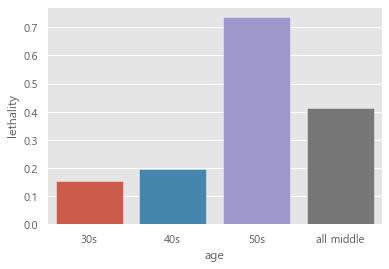

In [264]:
sns_plot = sns.barplot(data=patient_time304050, x="age", y="lethality")
fig = sns_plot.get_figure()
fig.savefig("30-50 lethality data.png")